In [ ]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import numpy as np
import zeus
print('zeus version:', zeus.__version__)

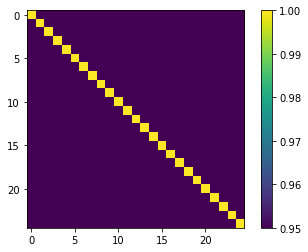

In [9]:
ndim = 25
nwalkers = 2 * ndim
nsteps= 20000

#C = make_spd_matrix(ndim)
C = np.identity(ndim)
C[C==0] = 0.95
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

#mu = np.random.rand(ndim) * 10.0
mu  = np.zeros(ndim)

def logp(x, mu, icov):
    if np.all(x>-10) and np.all(x<10):
        return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))
    else:
        return -np.inf

#start = np.random.rand(ndim)
start = mu + 1.0 * np.random.randn(nwalkers,ndim)

In [ ]:
from multiprocessing import Pool

with Pool() as pool:
    sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov], pool=pool)
    sampler.run(start, nsteps)

In [10]:
#sampler = zeus.sampler(logp, nwalkers, ndim, jump=0.0)
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov], jump=0.0, mu=1.0, tune=True, walk=False)
sampler.run(start, nsteps)

Initialising ensemble of 50 walkers...
Sampling progress : 100%|██████████| 20000/20000 [01:37<00:00, 204.47it/s]


In [ ]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(1):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler.chain[:,:,n].T,alpha=0.3)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten(burn=int(nsteps/2))
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()

print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))

sampler.summary

In [ ]:
sampler.efficiency

In [ ]:
sampler.mu

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(np.arange(nsteps),sampler.neval/nwalkers)
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(np.arange(nsteps),sampler.neval)
plt.show()

In [ ]:
mean_mu = np.mean(sampler.neval[int(nsteps/2):]/nwalkers)
std_mu = np.std(sampler.neval[int(nsteps/2):]/nwalkers)

plt.hist(sampler.neval/nwalkers)
plt.axvline(x=mean_mu, color='orange')
plt.axvline(x=mean_mu - std_mu, color='red')
plt.show()

print(mean_mu)
print(mean_mu - std_mu)

In [ ]:
np.mean(sampler.neval[-10:]/nwalkers)

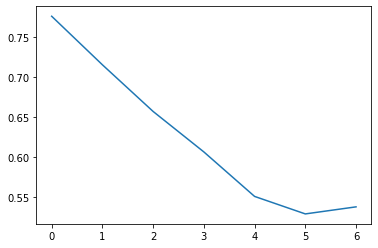

In [11]:
plt.plot(np.arange(len(sampler.mus)),sampler.mus)
plt.show()

In [12]:
sampler.mus

[0.7762237762237763,
 0.7155812937062938,
 0.6572746697746699,
 0.606715079792003,
 0.5511381259179263,
 0.5292675653656277,
 0.5380886914550548]

In [13]:
trace2 = sampler.flatten(burn=int(nsteps/2), thin=1)
print(np.cov(trace2,rowvar=False))

[[1.01064285 0.95931252 0.96163069 0.95777573 0.95753669 0.95662268
  0.9582813  0.9586013  0.95674516 0.95594395 0.95750136 0.95727009
  0.96056492 0.9549343  0.95900873 0.95490261 0.95654115 0.95771712
  0.95638402 0.95662051 0.95786851 0.95718918 0.95724809 0.95973837
  0.95664963]
 [0.95931252 1.00761253 0.95847306 0.95602675 0.95578212 0.95427376
  0.95653868 0.9564762  0.95511756 0.95450969 0.95481854 0.95621427
  0.95916336 0.95239075 0.95749836 0.95385212 0.95512142 0.9561965
  0.95459637 0.95545573 0.95617512 0.95541107 0.95627191 0.95771508
  0.95480768]
 [0.96163069 0.95847306 1.0102885  0.95835183 0.9576312  0.95704435
  0.95864299 0.9582811  0.95663748 0.95564772 0.95663286 0.95797463
  0.95954949 0.95357205 0.95985119 0.9560245  0.95690076 0.9574507
  0.9559324  0.95728009 0.95786402 0.95670006 0.95731716 0.95915712
  0.95618108]
 [0.95777573 0.95602675 0.95835183 1.00569012 0.95501031 0.95376216
  0.95546742 0.95645371 0.95424368 0.95403659 0.95480055 0.95550568
  0.9575

In [14]:
np.mean(trace2,axis=0)

array([-0.01000983, -0.00812684, -0.00745228, -0.00410239, -0.00552772,
       -0.00196991, -0.00482344, -0.00471472, -0.00562128, -0.00711022,
       -0.00592614, -0.00799017, -0.0074381 , -0.00862031, -0.00568476,
       -0.01031143, -0.00401611, -0.00249688, -0.01124868, -0.00730632,
       -0.00721335, -0.00897615, -0.00763424, -0.00612576, -0.00386143])